In [1]:
train_df <- read.csv("../Data/Titanic_train.csv")

In [2]:
# 1,2,3등 객실의 여성과 남성 생존율을 벡터로 저장하기   

# 벡터 초기화 
maleData <- c()
femaleData <- c()

SexVector <- c("female", "male")

for(j in SexVector){
    for(i in 1:3){
        femaleCount1st <-
            nrow(subset(train_df, (Sex == j)& (Pclass == i)))
        femaleLiveCount1st <- 
            nrow(subset(train_df, (Sex == j)& (Pclass == i) & (Survived ==1)))
   
    cat(i, "등 객실의", ifelse(j == "female", "여성", "남성"),"생존율은", femaleLiveCount1st, "/",
    femaleCount1st, ",",
    round(femaleLiveCount1st / femaleCount1st * 100,2), "%", "\n"
       )
    cat("---------------------------\n")
    
    if(j == "female"){
        femaleData[i] = round(femaleLiveCount1st / femaleCount1st * 100,2)
        }else{
        maleData[i] = round(femaleLiveCount1st / femaleCount1st * 100,2) 
        }
    }
}

1 등 객실의 여성 생존율은 91 / 94 , 96.81 % 
---------------------------
2 등 객실의 여성 생존율은 70 / 76 , 92.11 % 
---------------------------
3 등 객실의 여성 생존율은 72 / 144 , 50 % 
---------------------------
1 등 객실의 남성 생존율은 45 / 122 , 36.89 % 
---------------------------
2 등 객실의 남성 생존율은 17 / 108 , 15.74 % 
---------------------------
3 등 객실의 남성 생존율은 47 / 347 , 13.54 % 
---------------------------


In [4]:
# 막대그래프 그리기 위해서는 데이터 두 개를 합쳐줘야함.
vecData <- c(femaleData, maleData)
vecData

[1] 96.81 92.11 50.00 36.89 15.74 13.54

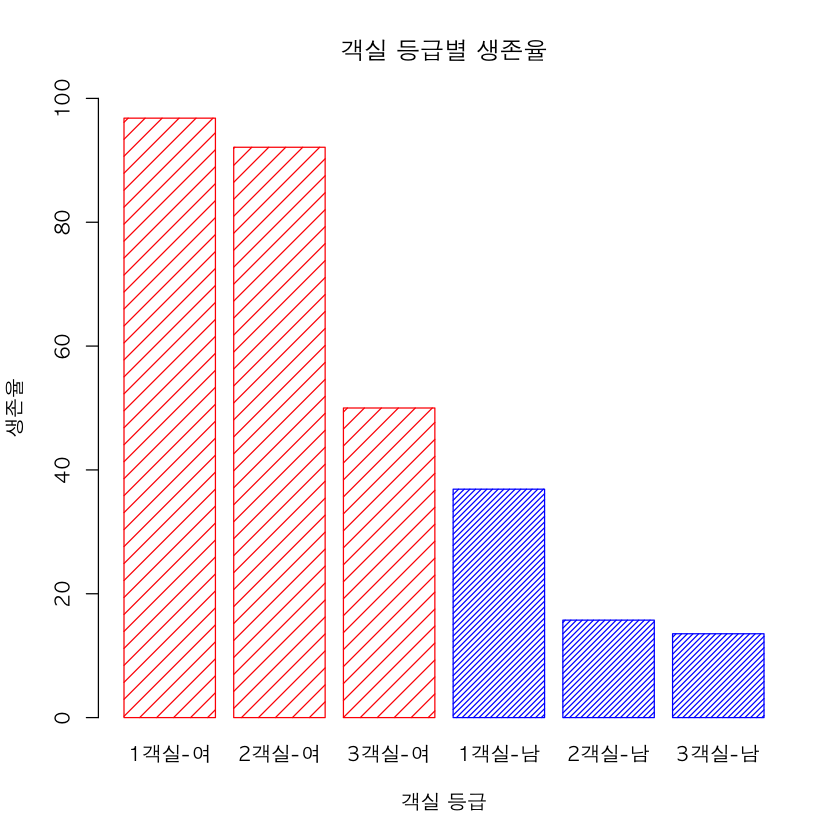

In [13]:
options(warn = -1)
par(family = "AppleGothic")

barplot(vecData,
       main = "객실 등급별 생존율",
       xlab = "객실 등급",
       ylab = "생존율",
       ylim = c(0,100),
       names = c("1객실-여","2객실-여","3객실-여",
                 "1객실-남","2객실-남","3객실-남"),
       col = c(rep("red",3), rep("blue",3)),
       border = c(rep("red",3), rep("blue",3)),
       density = c(rep(10,3), rep(30,3)))

In [14]:
# [Survived] <- [Sex, Pclass]

In [15]:
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


# Embarked와의 연관성 확인

In [16]:
str(train_df)
#Embarked에서 factor 4개 들어가있음

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 354 273 16 555 516 625 413 577 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [17]:
# Embarked의 항구이름 확인 -> ""가 있어서 factor가 4개인 것.
unique(train_df$Embarked) 

[1] S C Q  
Levels:  C Q S

In [19]:
# 빈칸 데이터 찾기 
subset(train_df, Embarked =="")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
62,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
830,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [22]:
# 항구별 인원수 (차이가 나면 누락된 2개 데이터를 많은 쪽으로 집어넣으면 됨)
# S항구 탑승 인원 
sum(train_df$Embarked == "S")

# C항구 탑승 인원
sum(train_df$Embarked == "C")

# Q항구 탑승 인원
sum(train_df$Embarked == "Q")

[1] 644

[1] 168

[1] 77

In [23]:
# "" 항구의 인원을 S항구로 변경 
train_df$Embarked[train_df$Embarked == ""] <- "S"

In [24]:
sum(train_df$Embarked == "S")

[1] 646

In [25]:
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 354 273 16 555 516 625 413 577 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [26]:
table(train_df$Embarked) #빈칸 항구 0이 있음. 


      C   Q   S 
  0 168  77 646 

In [30]:
# factor 조정 
train_df$Embarked <- factor(train_df$Embarked)
str(train_df)
table(train_df$Embarked)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 354 273 16 555 516 625 413 577 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 1 3 3 3 2 3 3 3 1 ...



  C   Q   S 
168  77 646 

In [31]:
# --> Embarked는 Feature로 사용 가능하다.  

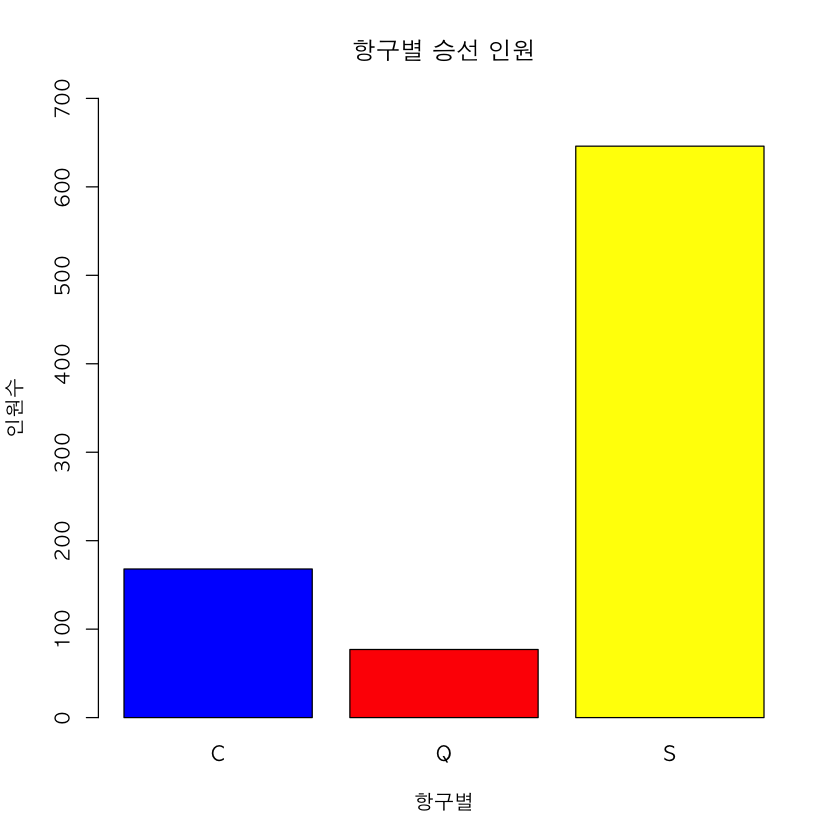

In [50]:
# 항구별 탑승 인원 
par(family = "AppleGothic")

barplot(table(train_df$Embarked),
       ylim = c(0,700),
       main = "항구별 승선 인원",
       xlab = "항구별",
       ylab = "인원수",
       col = c("blue","red","yellow")
       )

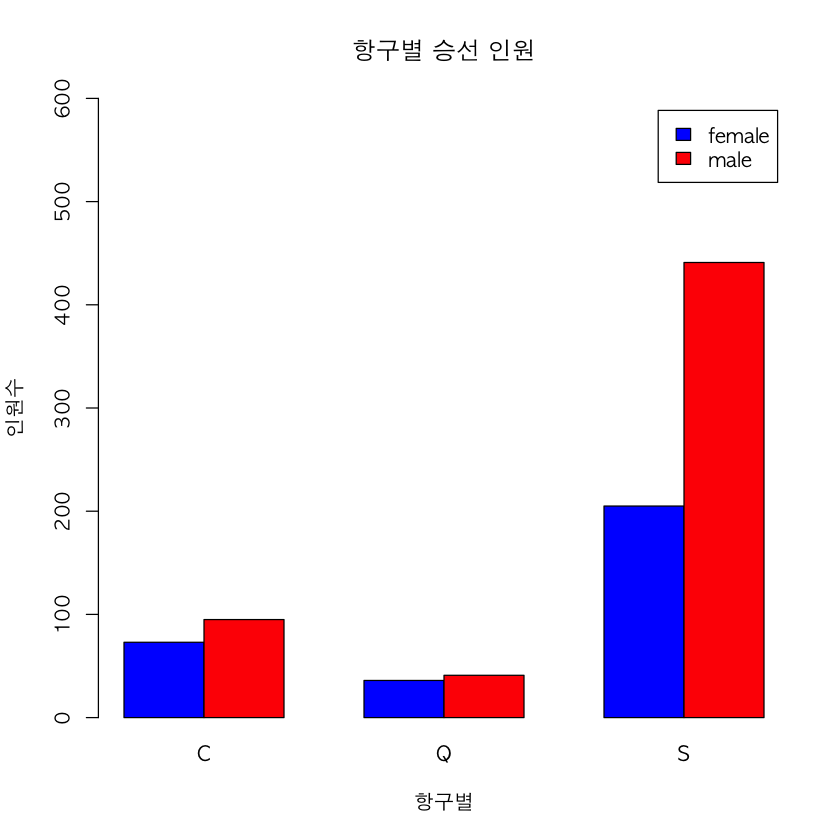

In [42]:
# 항구별 성별 탑승 인원 
par(family = "AppleGothic")

barplot(table(train_df$Sex, train_df$Embarked),
       beside = T,
       ylim = c(0,600),
       main = "항구별 승선 인원",
       xlab = "항구별",
       ylab = "인원수",
       col = c("blue","red"),
       legend.text = T,
       
       )

In [34]:
# 이 모양대로 막대그래프 그려지도록 (항구별 성별 인원)
table(train_df$Sex, train_df$Embarked)

        
           C   Q   S
  female  73  36 205
  male    95  41 441

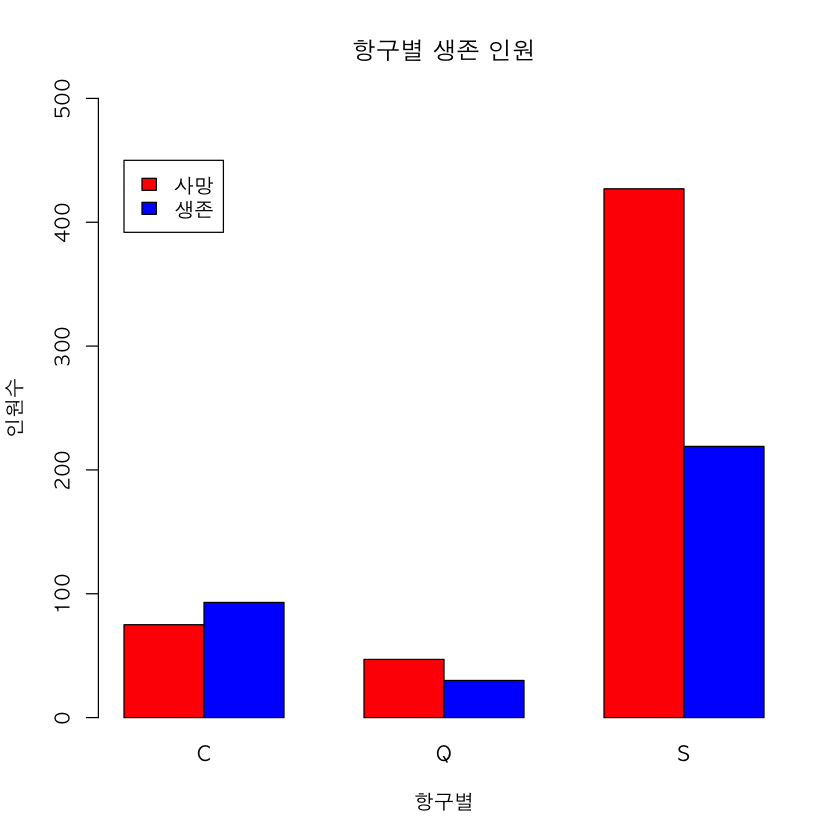

In [47]:
# 항구별 생존 인원 
par(family = "AppleGothic")

barplot(table(train_df$Survived, train_df$Embarked),
       beside = T,
       ylim = c(0,500),
       main = "항구별 생존 인원",
       xlab = "항구별",
       ylab = "인원수",
       col = c("red","blue"),
      #legend.text = T,
       )

legend(1, 450,
       c("사망","생존"),
       fill = c("red", "blue")) #lengend.text는 막아두기


# 혹시 c항구에서 탄 사람 중에는 1등석 사람이 많으려나? 사망보다 생존이 많으니까 

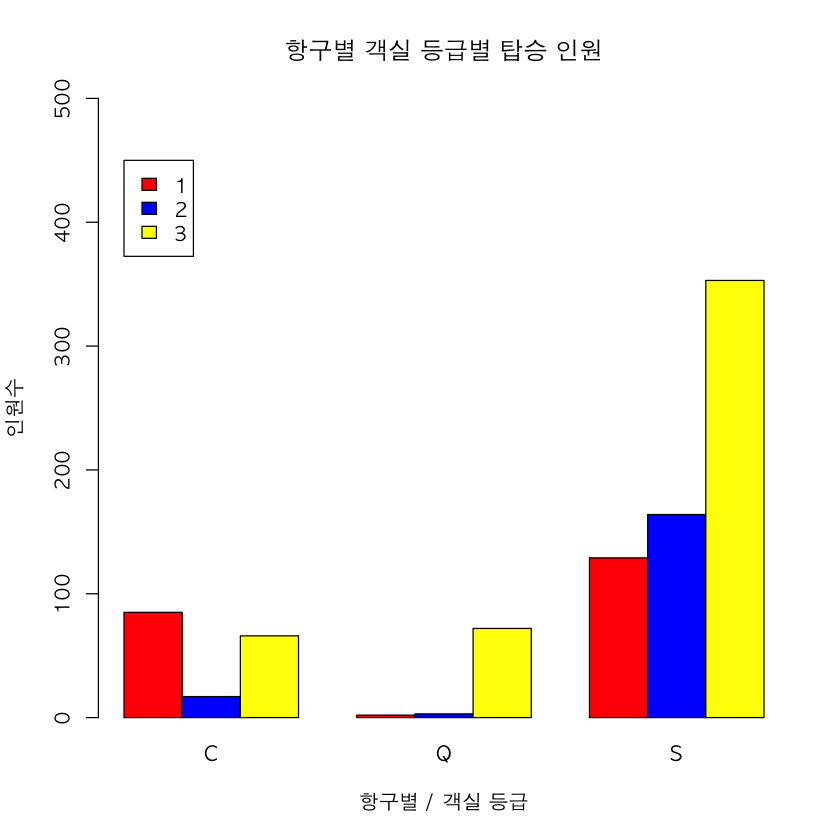

In [49]:
# 항구별 객실 등급별 탑승 인원 
par(family = "AppleGothic")

barplot(table(train_df$Pclass, train_df$Embarked),
       beside = T,
       ylim = c(0,500),
       main = "항구별 객실 등급별 탑승 인원",
       xlab = "항구별 / 객실 등급",
       ylab = "인원수",
       col = c("red","blue","yellow")
      #legend.text = T,
       )

legend(1, 450,
       c("1","2","3"),
       fill = c("red", "blue","yellow"))

# C항구 가장 잘살고, Q항구 가장 못살 것으로 예측. 

# 그래프 한눈에 보기 

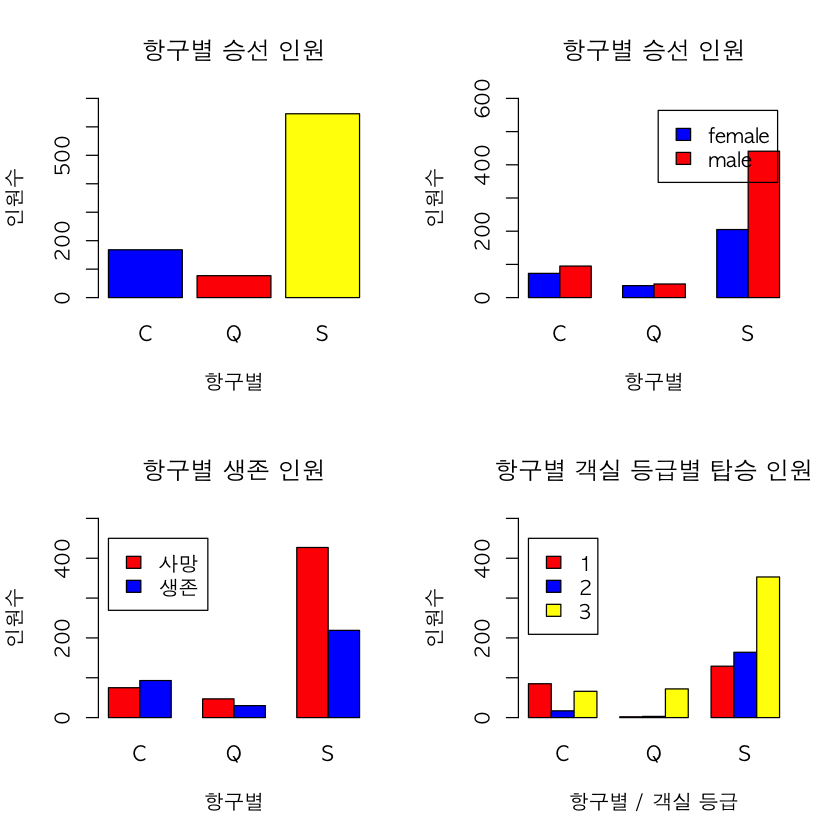

In [51]:
par(family = "AppleGothic")

temp <- split.screen(c(2,2))

#1 항구별 탑승인원
screen(1)
barplot(table(train_df$Embarked),
       ylim = c(0,700),
       main = "항구별 승선 인원",
       xlab = "항구별",
       ylab = "인원수",
       col = c("blue","red","yellow")
       )

#2 항구별 성별 탑승인원
screen(2)
barplot(table(train_df$Sex, train_df$Embarked),
       beside = T,
       ylim = c(0,600),
       main = "항구별 승선 인원",
       xlab = "항구별",
       ylab = "인원수",
       col = c("blue","red"),
       legend.text = T,
       )

#3 항구별 생존 인원
screen(3)
barplot(table(train_df$Survived, train_df$Embarked),
       beside = T,
       ylim = c(0,500),
       main = "항구별 생존 인원",
       xlab = "항구별",
       ylab = "인원수",
       col = c("red","blue"),
      #legend.text = T,
       )

legend(1, 450,
       c("사망","생존"),
       fill = c("red", "blue"))

#4 항구별 객실 등급별 탑승 인원 
screen(4)
barplot(table(train_df$Pclass, train_df$Embarked),
       beside = T,
       ylim = c(0,500),
       main = "항구별 객실 등급별 탑승 인원",
       xlab = "항구별 / 객실 등급",
       ylab = "인원수",
       col = c("red","blue","yellow")
      #legend.text = T,
       )

legend(1, 450,
       c("1","2","3"),
       fill = c("red", "blue","yellow"))

절반 이상의 승객이 S항구에서 배를 탔으며, 여기에서 탑승한 승객의 70%가 남성이었다.     
남성의 사망률이 여성보다 훨씬 높았으므로 S항구의 사망률이 높게 나왔다.     
S항구에서 탑승한 승객의 60%이상이 3등급 객실을 사용했다.     
C항구에서 탑승한 승객들은 1등 객실 비중이 높고 생존률이 높은 것으로 보아 이 동네는 부자 동네이다.      

In [52]:
# 생존과 티켓등급의 상관계수
cor(train_df$Survived, train_df$Pclass) # 30%로 역상관. 사망은 등급 낮은 순으로 많이 죽음. 

[1] -0.338481

In [53]:
# [Survived] <- [Sex, Pclass, Embarked]

# RandomForest로 예측 모델 생성 


In [54]:
# 원본은 두고 복사본 생성 
train_df_T <- train_df

In [55]:
# 예측을 위한 컬럼 확인 
target_col <- c("Survived", "Sex", "Pclass", "Embarked")
head(train_df_T[target_col]) 

Survived,Sex,Pclass,Embarked
0,male,3,S
1,female,1,C
1,female,3,S
1,female,1,S
0,male,3,S
0,male,3,Q


In [56]:
# 성별을 숫자로 변경 
train_df_T$SexCode[train_df_T$Sex == "male"] <- 0
train_df_T$SexCode[train_df_T$Sex == "female"] <- 1

In [58]:
head(train_df_T)
tail(train_df_T)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,0
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q,1
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,,S,0
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S,1
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,,S,1
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C,0
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,,Q,0


In [62]:
# Sex 컬럼 삭제
train_df_T <- subset(train_df_T, select = -Sex)
head(train_df_T)

PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",38,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,,S,0
6,0,3,"Moran, Mr. James",NA,0,0,330877,8.4583,,Q,0


In [63]:
target_col <- c("Survived","SexCode","Pclass","Embarked")
head(train_df_T[target_col])

# 0,1 사용하는 이유. 머신러닝이 1,2로 하면 1+1=2이기에 남+남=여 혹은 사망+사망=생존으로 잘못 인식할 수도 있음

Survived,SexCode,Pclass,Embarked
0,0,3,S
1,1,1,C
1,1,3,S
1,1,1,S
0,0,3,S
0,0,3,Q


## Embarked를 숫자로 전환 (현재는 factor이기 때문에)
C <- 0, S <- 1, Q <-2 : 맞긴 맞지만 좋은 생각은 아니다.    
S + S = Q ? 머신러닝이 이렇게 오판할 수 있음.     
--> One-Hot Encoding 방법 사용     
C = [1,0,0] [T,F,F]    
S = [0,1,0] [F,T,F]    
Q = [0,0,1] [F,F,T]     

In [64]:
train_df_T$Embarked_C <- train_df_T$Embarked == "C"
train_df_T$Embarked_S <- train_df_T$Embarked == "S"
train_df_T$Embarked_Q <- train_df_T$Embarked == "Q"

In [65]:
# 확인
train_df_T[c("Embarked", "Embarked_C", "Embarked_S", "Embarked_Q")]

Embarked,Embarked_C,Embarked_S,Embarked_Q
S,FALSE,TRUE,FALSE
C,TRUE,FALSE,FALSE
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE
Q,FALSE,FALSE,TRUE
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE
C,TRUE,FALSE,FALSE


In [67]:
target_col = c("Survived", "SexCode","Pclass","Embarked_C","Embarked_S","Embarked_Q")
head(train_df_T[target_col])

Survived,SexCode,Pclass,Embarked_C,Embarked_S,Embarked_Q
0,0,3,FALSE,TRUE,FALSE
1,1,1,TRUE,FALSE,FALSE
1,1,3,FALSE,TRUE,FALSE
1,1,1,FALSE,TRUE,FALSE
0,0,3,FALSE,TRUE,FALSE
0,0,3,FALSE,FALSE,TRUE


# RandomForest 작업

In [107]:
# Sampling
set.seed(1234)
library(caret)

In [108]:
samp <- createDataPartition(train_df_T$Survived, p=0.7, list=F)

In [109]:
# 학습용 
data.train <- train_df_T[samp,]
# 검증용
data.test <- train_df_T[-samp,]

In [110]:
head(data.train)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode,Embarked_C,Embarked_S,Embarked_Q
1,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,,S,0,FALSE,TRUE,FALSE
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",38,1,0,PC 17599,71.2833,C85,C,1,TRUE,FALSE,FALSE
3,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,,S,1,FALSE,TRUE,FALSE
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,C123,S,1,FALSE,TRUE,FALSE
10,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14,1,0,237736,30.0708,,C,1,TRUE,FALSE,FALSE
11,11,1,3,"Sandstrom, Miss. Marguerite Rut",4,1,1,PP 9549,16.7000,G6,S,1,FALSE,TRUE,FALSE


In [111]:
# Training data. 필요한 데이터만으로 구성
train_data <- data.train[target_col]
head(train_data)

,Survived,SexCode,Pclass,Embarked_C,Embarked_S,Embarked_Q
1,0,0,3,FALSE,TRUE,FALSE
2,1,1,1,TRUE,FALSE,FALSE
3,1,1,3,FALSE,TRUE,FALSE
4,1,1,1,FALSE,TRUE,FALSE
10,1,1,2,TRUE,FALSE,FALSE
11,1,1,3,FALSE,TRUE,FALSE


In [112]:
# Test dada
test_data <- data.test[target_col]
head(test_data)

,Survived,SexCode,Pclass,Embarked_C,Embarked_S,Embarked_Q
5,0,0,3,FALSE,TRUE,FALSE
6,0,0,3,FALSE,FALSE,TRUE
7,0,0,1,FALSE,TRUE,FALSE
8,0,0,3,FALSE,TRUE,FALSE
9,1,1,3,FALSE,TRUE,FALSE
16,1,1,2,FALSE,TRUE,FALSE


In [113]:
library(randomForest)

In [114]:
# 학습시키기 (., =survived 빼고 다)
rf <- randomForest(Survived ~ ., data=train_data, ntree=100)

In [115]:
# 문제와 정답 만들기
x <- subset(data.test, select =  -Survived)
y <- data.test$Survived

In [116]:
pred <- predict(rf, x)
head(pred)
# 5번째 사람은 생존 가능성이 23%

5         6         7         8         9        16 
0.2351895 0.2656557 0.3698975 0.2351895 0.3956600 0.5611091

In [117]:
pred[pred <= 0.5] <- 0
pred[pred > 0.5] <- 1
head(pred)

5  6  7  8  9 16 
 0  0  0  0  0  1

In [118]:
# 예측력 79%
mean(pred == y) 

# 오분류표 
table(pred, y)

[1] 0.7977528

    y
pred   0   1
   0 165  50
   1   4  48

# Survived를 factor로 변환 후 Machine learning
- Survived 값 예측 시 0.xxx 말고 0과 1이 나오도록

In [121]:
#factor로 변환 
train_data$Survived <- as.factor(train_data$Survived)
test_data$Survived <- as.factor(test_data$Survived)

In [122]:
str(train_data) # survived를 0,1로 바꿈

'data.frame':	624 obs. of  6 variables:
 $ Survived  : Factor w/ 2 levels "0","1": 1 2 2 2 2 2 2 1 1 1 ...
 $ SexCode   : num  0 1 1 1 1 1 1 0 0 1 ...
 $ Pclass    : int  3 1 3 1 2 3 1 3 3 3 ...
 $ Embarked_C: logi  FALSE TRUE FALSE FALSE TRUE FALSE ...
 $ Embarked_S: logi  TRUE FALSE TRUE TRUE FALSE TRUE ...
 $ Embarked_Q: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...


In [123]:
# randomForest Model 

In [124]:
rf <- randomForest(Survived ~ ., data=train_data, ntree=100)

In [129]:
# 문제와 정답 만들기
x <- subset(test_data, select =  -Survived)
y <- test_data$Survived

In [130]:
pred <- predict(rf, x)
head(pred)

5  6  7  8  9 16 
 0  0  0  0  0  1 
Levels: 0 1

In [131]:
mean(pred == y) 
table(pred, y)

[1] 0.8277154

    y
pred   0   1
   0 162  39
   1   7  59

# Survived의 생사비율을 동일하게 만들어서 분석 

In [132]:
# 생존과 사망 숫자
nrow(subset(train_df, Survived == 0)) # 사망
nrow(subset(train_df, Survived == 1)) # 생존

[1] 549

[1] 342

In [133]:
# 사망자수에서 Sampling
sampDeath <- sample(1:549, 342)

In [134]:
# 사망자 549명을 342명으로 sampling하여 새로운 Dataset 생성 
train_df_Death <- train_df[sampDeath,]
nrow(train_df_Death)

[1] 342

In [135]:
head(train_df_Death)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
483,483,0,3,"Rouse, Mr. Richard Henry",male,50,0,0,A/5 3594,8.0500,,S
303,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19,0,0,LINE,0.0000,,S
328,328,1,2,"Ball, Mrs. (Ada E Hall)",female,36,0,0,28551,13.0000,D,S
40,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14,1,0,2651,11.2417,,C
505,505,1,1,"Maioni, Miss. Roberta",female,16,0,0,110152,86.5000,B79,S
363,363,0,3,"Barbara, Mrs. (Catherine David)",female,45,0,1,2691,14.4542,,C


In [137]:
# 생존자 Dataset 생성 
train_df_Survive <- subset(train_df, Survived ==1)
nrow(train_df_Survive)

[1] 342

In [139]:
# 개수가 동일한 사망자와 생존자가 있는 Dataset을 생성 
train_df_New <- rbind(train_df_Death, train_df_Survive)
str(train_df_New)

'data.frame':	684 obs. of  12 variables:
 $ PassengerId: int  483 303 328 40 505 363 8 536 233 83 ...
 $ Survived   : int  0 0 1 1 1 0 0 1 0 1 ...
 $ Pclass     : int  3 3 2 3 1 3 3 2 2 3 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 707 412 61 590 502 65 625 342 755 520 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 2 1 1 1 1 2 1 2 1 ...
 $ Age        : num  50 19 36 14 16 45 2 7 59 NA ...
 $ SibSp      : int  0 0 0 1 0 0 3 0 0 0 ...
 $ Parch      : int  0 0 0 0 0 1 1 2 0 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 532 575 230 187 1 212 396 572 129 281 ...
 $ Fare       : num  8.05 0 13 11.24 86.5 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 1 92 1 44 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 3 3 1 3 1 3 3 3 2 ...


In [143]:
# rownames 정리 
rownames(train_df_New) <- c()

In [144]:
# 성별을 숫자로 전환 
train_df_New$SexCode[train_df_New$Sex == "male"] <- 0
train_df_New$SexCode[train_df_New$Sex == "female"] <- 1

In [145]:
# Embarked의 One-Hot Encoding
train_df_New$Embarked_C <- train_df_New$Embarked == "C"
train_df_New$Embarked_S <- train_df_New$Embarked == "S"
train_df_New$Embarked_Q <- train_df_New$Embarked == "Q"

In [146]:
# 확인
train_df_New[c("Embarked", "Embarked_C", "Embarked_S", "Embarked_Q")]

Embarked,Embarked_C,Embarked_S,Embarked_Q
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE
C,TRUE,FALSE,FALSE
S,FALSE,TRUE,FALSE
C,TRUE,FALSE,FALSE
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE
Q,FALSE,FALSE,TRUE


In [147]:
target_col = c("Survived", "SexCode","Pclass","Embarked_C","Embarked_S","Embarked_Q")
head(train_df_New[target_col])

Survived,SexCode,Pclass,Embarked_C,Embarked_S,Embarked_Q
0,0,3,FALSE,TRUE,FALSE
0,0,3,FALSE,TRUE,FALSE
1,1,2,FALSE,TRUE,FALSE
1,1,3,TRUE,FALSE,FALSE
1,1,1,FALSE,TRUE,FALSE
0,1,3,TRUE,FALSE,FALSE


In [148]:
# Fare 항목 

In [149]:
# Age 항목 (na빼고)

In [ ]:
# Model : 인공신경망, ctree, SVM, 로지스틱 회귀분석 (sampling, ntree 수를 바꿔서)